In [2]:
import pandas as pd
import QCircNet.utils as ut

PLOT_PATH = 'results/plots/'

In [3]:
df  = pd.read_csv('results/bin_model_results_expID_1.csv', index_col=0)
df.sort_values(by='f1_score', inplace=True, ascending=False)
df.head(5)

,id,f1_score,precision,recall,accuracy,cross_entropy,seed,circuit,learning_rate,loss_history,val_losses,val_f1s,avg_epoch_time_seconds,network_str,model_path,weight_path,epochs,n_qubits,features_per_qubit,scaler
18,18,0.983160,0.987118,0.979233,0.982759,0.498714,3,Senokosov2024Circuit,0.010,"[0.541897670414887, 0.5019576883825817]","[0.5030568838119507, 0.4965728223323822]","[0.9778481012658228, 0.9808]",100.991342,BinQuantumNeuralNetwork(\n (quantum_circuit_n...,results/models/bin/Senokosov2024Circuit_expID_...,results/weights/bin/,2,4,4,MinMaxScaler
22,22,0.978417,0.979200,0.977636,0.977833,0.535305,3,DoubleEntanglementVLCircuit,0.010,"[0.6165982292670953, 0.5461352215589661]","[0.5789342522621155, 0.5329049825668335]","[0.9805825242718447, 0.9808612440191388]",53.495534,BinQuantumNeuralNetwork(\n (quantum_circuit_n...,results/models/bin/DoubleEntanglementVLCircuit...,results/weights/bin/,2,4,4,MinMaxScaler
19,19,0.972419,0.959565,0.985623,0.971264,0.567235,3,Senokosov2024Circuit,0.001,"[0.6530404398707967, 0.5818299376650861]","[0.6000205874443054, 0.5650476217269897]","[0.8946236559139785, 0.973186119873817]",101.283561,BinQuantumNeuralNetwork(\n (quantum_circuit_n...,results/models/bin/Senokosov2024Circuit_expID_...,results/weights/bin/,2,4,4,MinMaxScaler
11,11,0.972112,0.969793,0.974441,0.971264,0.623963,2,Senokosov2024Circuit,0.001,"[0.678131596038216, 0.6399023946570722]","[0.6565280556678772, 0.6244298815727234]","[0.9702333065164923, 0.9721559268098647]",102.590774,BinQuantumNeuralNetwork(\n (quantum_circuit_n...,results/models/bin/Senokosov2024Circuit_expID_...,results/weights/bin/,2,4,4,MinMaxScaler
10,10,0.969502,0.974194,0.964856,0.968801,0.575135,2,Senokosov2024Circuit,0.010,"[0.6030089853233412, 0.5755299143493176]","[0.5791273713111877, 0.575461208820343]","[0.9731437598736177, 0.9728]",101.878930,BinQuantumNeuralNetwork(\n (quantum_circuit_n...,results/models/bin/Senokosov2024Circuit_expID_...,results/weights/bin/,2,4,4,MinMaxScaler


Error loading val_loss_history: 'val_loss_history'


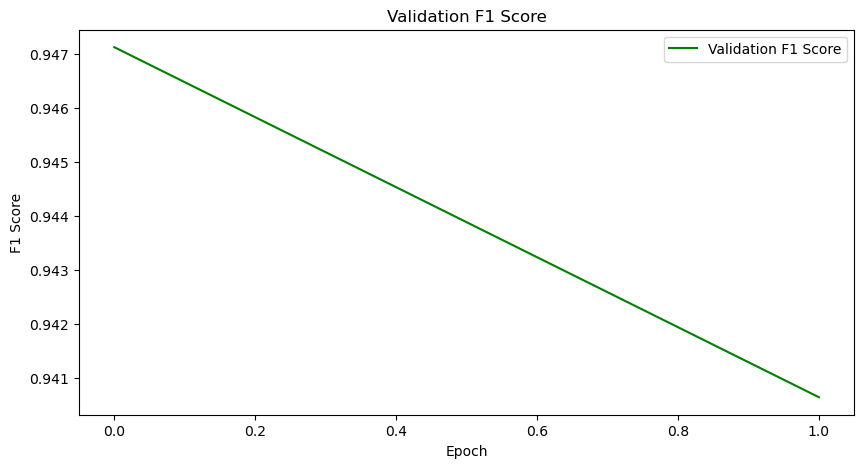

In [4]:
ut.plot_training_history(df, run_id=44, save_path=PLOT_PATH)

In [5]:
# group by circuit, learning_rate
avg_results = df.copy()
avg_results = avg_results.groupby(['circuit', 'learning_rate']).mean(numeric_only=True)
avg_results.drop(columns=['id'], inplace=True)

In [6]:
avg_results.sort_values(by='f1_score', ascending=False)

f1_score  precision    recall  \
circuit                     learning_rate                                  
DoubleEntanglementVLCircuit 0.010          0.825240   0.765544  0.938339   
Senokosov2024Circuit        0.010          0.821310   0.760447  0.941693   
Anusha2024Circuit           0.010          0.815236   0.754783  0.917412   
Senokosov2024Circuit        0.001          0.802246   0.741155  0.938339   
Ranga2024Circuit            0.010          0.799916   0.755768  0.905112   
                            0.001          0.767721   0.686982  0.922045   
DoubleEntanglementVLCircuit 0.001          0.721576   0.742884  0.822684   
Anusha2024Circuit           0.001          0.488433   0.621950  0.607029   

                                           accuracy  cross_entropy  seed  \
circuit                     learning_rate                                  
DoubleEntanglementVLCircuit 0.010          0.769622       0.594293   5.5   
Senokosov2024Circuit        0.010          0.760673       0.589684   5.5   
Anusha2024Circuit           0.010          0.769376       0.582278   5.5   
Senokosov2024Circuit        0.001          0.738342       0.638408   5.5   
Ranga2024Circuit            0.010          0.746962       0.604501   5.5   
                            0.001          0.694745       0.651512   5.5   
DoubleEntanglementVLCircuit 0.001          0.696305       0.653306   5.5   
Anusha2024Circuit           0.001          0.566256       0.671852   5.5   

                                           avg_epoch_time_seconds  epochs  \
circuit                     learning_rate                                   
DoubleEntanglementVLCircuit 0.010                       53.503694     2.0   
Senokosov2024Circuit        0.010                      101.675059     2.0   
Anusha2024Circuit           0.010                       30.906542     2.0   
Senokosov2024Circuit        0.001                      101.467326     2.0   
Ranga2024Circuit            0.010                       91.602043     2.0   
                            0.001                       90.821763     2.0   
DoubleEntanglementVLCircuit 0.001                       53.375971     2.0   
Anusha2024Circuit           0.001                       30.991510     2.0   

                                           n_qubits  features_per_qubit  
circuit                     learning_rate                                
DoubleEntanglementVLCircuit 0.010               4.0                 4.0  
Senokosov2024Circuit        0.010               4.0                 4.0  
Anusha2024Circuit           0.010               4.0                 4.0  
Senokosov2024Circuit        0.001               4.0                 4.0  
Ranga2024Circuit            0.010               4.0                 4.0  
                            0.001               4.0                 4.0  
DoubleEntanglementVLCircuit 0.001               4.0                 4.0  
Anusha2024Circuit           0.001               4.0                 4.0